<a href="https://colab.research.google.com/github/PavanSETTEM-003/pneumonia_detection_using_resnet/blob/main/pneumonia_detection_using_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp;    &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Resnet architecture-based Convolution Neural Network




A machine learning model has been developed to detect pneumonia from x-ray images. The dataset used for training and evaluating the model includes chest x-ray images that have been labeled as either normal or pneumonia.<br> Pneumonia is a lung infection caused by bacteria or viruses that results in inflammation and the buildup of fluid in the lungs, leading to difficulty in breathing. The model uses these labeled images to learn to classify new x-ray images as normal or indicating pneumonia.


<hr>

**Dataset**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[no of images]<br>
   |<br>
   |------ **Train**<br>
   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|<br>
   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|  >> Normal&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1200]<br>
   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|  >> Pneumonia  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1200]<br>
   |<br>
   |------ **Test**<br>
   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|<br>
   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| >> Normal&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[242]<br>
   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| >> Pneumonia   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[398]<br>
   <br>

<hr>

The model was trained on a dataset that has an equal number of images from both classes (normal and pneumonia)<br>
The test dataset was then used to evaluate the model's accuracy.<br>

The process includes:

*   Loading the images into the development environment using the os library
*   Preprocessing the images
*   Training the CNN model with the train dataset
*   Analyzing the classification performance of the model





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
## data from the files were fetched into the local variables
normal_train_path = r"/content/drive/MyDrive/Cancer prediction/Resized_256*256/Train/NORMAL"
normal_train_img = os.listdir(normal_train_path)

normal_train = []
for img in normal_train_img[0:1200]:
  input_img = cv2.imread(normal_train_path+ '/' + img,0)
  input_img = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)   ## converting to gray scale to reduce the computations
  normal_train.append(input_img)                           ## appending the read images values to a list 
print("shape",np.shape(normal_train))

normal_train_array = np.array(normal_train)                ## list to numpy array conversion
normal_train_array = normal_train_array.astype('float32')

normal_train_array /= 255                                  ## dividing every pixel value by 255 will bring the total pixel values in between the range to 0-1
normal_train_array.shape

shape (1200, 256, 256, 3)


(1200, 256, 256, 3)

In [ ]:
pneumonic_train_path = r"/content/drive/MyDrive/Cancer prediction/Resized_256*256/Train/PNEUMONIA"
pneumonic_train_img = os.listdir(pneumonic_train_path)

pneumonic_train = []
for img in pneumonic_train_img[0:1200]:
  input_img = cv2.imread(pneumonic_train_path+ '/' + img,0)
  input_img = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
  pneumonic_train.append(input_img)
print("shape",np.shape(pneumonic_train))

pneumonic_train_array = np.array(pneumonic_train)
pneumonic_train_array = pneumonic_train_array.astype('float32')

pneumonic_train_array /= 255
pneumonic_train_array.shape

shape (1200, 256, 256, 3)


(1200, 256, 256, 3)

In [ ]:
normal_test_path = r"/content/drive/MyDrive/Cancer prediction/Resized_256*256/test/NORMAL"
normal_test_img = os.listdir(normal_test_path)

normal_test = []
for img in normal_test_img:
  input_img = cv2.imread(normal_test_path+ '/' + img,0)
  input_img = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
  normal_test.append(input_img)
print("shape",np.shape(normal_test))

normal_test_array = np.array(normal_test)
normal_test_array = normal_test_array.astype('float32')

normal_test_array /= 255
normal_test_array.shape

shape (234, 256, 256, 3)


(234, 256, 256, 3)

In [ ]:
pneumonic_test_path = r"/content/drive/MyDrive/Cancer prediction/Resized_256*256/test/PNEUMONIA"
pneumonic_test_img = os.listdir(pneumonic_test_path)

pneumonic_test = []
for img in pneumonic_test_img:
  input_img = cv2.imread(pneumonic_test_path+ '/' + img,0)
  input_img = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
  pneumonic_test.append(input_img)
print("shape",np.shape(pneumonic_test))

pneumonic_test_array = np.array(pneumonic_test)
pneumonic_test_array = pneumonic_test_array.astype('float32')

pneumonic_test_array /= 255
pneumonic_test_array.shape

shape (390, 256, 256, 3)


(390, 256, 256, 3)

In [ ]:
x_train = np.vstack((normal_train_array,pneumonic_train_array))
x_test = np.vstack((normal_test_array,pneumonic_test_array))
print(x_train.shape,x_test.shape)


y_train  = [0]*(normal_train_array.shape[0]) + [1]*(pneumonic_train_array.shape[0])
y_test = [0]*(normal_test_array.shape[0]) + [1]*pneumonic_test_array.shape[0]
print(len(y_train),len(y_test))
from keras.utils import to_categorical
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)



x_train,y_train = shuffle(x_train,y_train,random_state =3)
x_test,y_test = shuffle(x_test,y_test,random_state =3)

(2400, 256, 256, 3) (624, 256, 256, 3)
2400 624


## model

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
resnet_model = Sequential()
model = tf.keras.applications.ResNet50(
    include_top=False,
    weights = None,
    input_shape=(256,256,3),
    classes=2)

for layers in model.layers:
  layers.trainable = False

resnet_model.add(model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation="relu"))
resnet_model.add(Dense(256,activation="relu"))
resnet_model.add(Dense(2,activation="softmax"))




In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 131072)           0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              67109376  
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 256)              131328    
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2)                514       
 pper)                                                  

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = resnet_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
75/75 [==============================] - 26s 197ms/step - loss: 0.6451 - accuracy: 0.7692 - val_loss: 0.3938 - val_accuracy: 0.8093
Epoch 2/50
75/75 [==============================] - 13s 174ms/step - loss: 0.1838 - accuracy: 0.9292 - val_loss: 0.7561 - val_accuracy: 0.7372
Epoch 3/50
75/75 [==============================] - 13s 174ms/step - loss: 0.1739 - accuracy: 0.9304 - val_loss: 0.5756 - val_accuracy: 0.7869
Epoch 4/50
75/75 [==============================] - 13s 176ms/step - loss: 0.1879 - accuracy: 0.9346 - val_loss: 0.4976 - val_accuracy: 0.7997
Epoch 5/50
75/75 [==============================] - 13s 174ms/step - loss: 0.1291 - accuracy: 0.9508 - val_loss: 0.4638 - val_accuracy: 0.8205
Epoch 6/50
75/75 [==============================] - 13s 175ms/step - loss: 0.1285 - accuracy: 0.9513 - val_loss: 0.5112 - val_accuracy: 0.8093
Epoch 7/50
75/75 [==============================] - 13s 172ms/step - loss: 0.1042 - accuracy: 0.9604 - val_loss: 0.5803 - val_accuracy: 0.7949

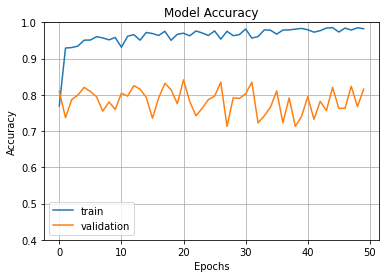

In [ ]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

The resnet architecture performed with an accuracy of 98% and validation accuracy as 81% in correctly classifying the images into their respective classes.